In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, metrics, neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# SVM

### The Features(X) are the independent  -- means it does not affect by the label(y-value)

In [2]:
iris = datasets.load_iris()

# Separate or divid to feature(X) and label(y)
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Origin data :- ', X.shape)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


Origin data :-  (150, 4)
(120, 4) (30, 4)
(120,) (30,)


In [3]:
classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# create your svm model
svmModel = svm.SVC()
print(svmModel)

SVC()


In [5]:
# feed your model
svmModel.fit(X_train, y_train)
xTrainPred = svmModel.predict(X_test)
print(xTrainPred)

[1 1 0 2 0 1 2 0 2 0 0 2 1 2 2 2 0 2 1 0 0 0 0 0 0 1 0 2 2 0]


In [6]:
# accuracu
xTrainAccu = accuracy_score(y_test, xTrainPred)
print(xTrainAccu)

0.9666666666666667


In [8]:
#  you can see the prediction by matching to the classes name if you want
for ix, val in enumerate(xTrainPred, start=0):
    print(classes[val])

# Iris in DataFrame ---------

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
# make Dataframe
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# add the label or target
iris_df['target'] = iris['target']

iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [10]:
# dir(iris)

In [11]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# you can use .apply  or replace for replaceing the target  

In [12]:
iris_df['flower_name'] = iris_df['target'].apply(lambda x: iris['target_names'][x])
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


### cluster the sepal form target label

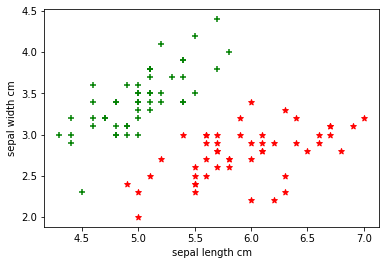

In [17]:
df_0 = iris_df[iris_df['target'] == 0]
df_1 = iris_df[iris_df['target'] == 1]
df_2 = iris_df[iris_df['target'] == 2]



plt.xlabel('sepal length cm')
plt.ylabel('sepal width cm')

plt.scatter(df_0['sepal length (cm)'], df_0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df_1['sepal length (cm)'], df_1['sepal width (cm)'], color='red', marker='*')
#plt.scatter(df_1['sepal length (cm)'], df_2['sepal width (cm)'], color='blue', marker='.')

plt.show()


### cluster the petal form target label

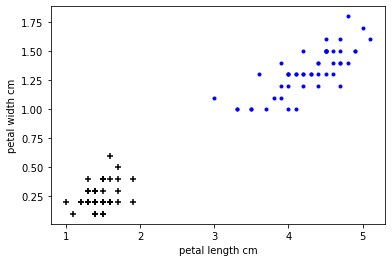

In [16]:
plt.xlabel('petal length cm')
plt.ylabel('petal width cm')

plt.scatter(df_0['petal length (cm)'], df_0['petal width (cm)'], color='black', marker='+')
plt.scatter(df_1['petal length (cm)'], df_1['petal width (cm)'], color='blue', marker='.')

plt.show()

# Now lets split-train-test-predict

In [105]:
from sklearn.model_selection import train_test_split

XX = iris_df.drop(columns=['target', 'flower_name'], axis=1)
yy = iris_df['target']

XX_trian, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2)

# create model
from sklearn import svm

model = svm.SVC()
model.fit(XX_trian, yy_train)
pre = model.predict(XX_test)
acc = accuracy_score(yy_test, pre)
print(acc)


0.9666666666666667


In [106]:
# you can use this instead of accuracey_score
model.score(XX_test, yy_test)

0.9666666666666667

In [ ]:
# svm model drows a marign b/n classifications 